In [1]:
import os.path
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow
import numpy as np
%matplotlib inline

In [2]:
path = '../zero_fractions'
num_files = len([f for f in os.listdir(path)
                if os.path.isfile(os.path.join(path, f))])
CLASSES = ('aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')
class_to_ind = dict(list(zip(CLASSES, list(range(len(CLASSES))))))
arr_hm = [np.zeros([num_files,20,64], dtype=float),
            np.zeros([num_files,20,64], dtype=float),
            np.zeros([num_files,20,128], dtype=float),
            np.zeros([num_files,20,128], dtype=float),
            np.zeros([num_files,20,256], dtype=float),
            np.zeros([num_files,20,256], dtype=float),
            np.zeros([num_files,20,256], dtype=float),
            np.zeros([num_files,20,512], dtype=float),
            np.zeros([num_files,20,512], dtype=float),
            np.zeros([num_files,20,512], dtype=float),
            np.zeros([num_files,20,512], dtype=float),
            np.zeros([num_files,20,512], dtype=float),
            np.zeros([num_files,20,512], dtype=float)]
num_clas = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [3]:
print class_to_ind

{'sheep': 16, 'horse': 12, 'bicycle': 1, 'aeroplane': 0, 'cow': 9, 'sofa': 17, 'bus': 5, 'dog': 11, 'cat': 7, 'person': 14, 'train': 18, 'diningtable': 10, 'bottle': 4, 'car': 6, 'pottedplant': 15, 'tvmonitor': 19, 'chair': 8, 'bird': 2, 'boat': 3, 'motorbike': 13}


In [46]:
keys = []
for key in class_to_ind:
    keys.append(key)
print len(keys)

20


In [27]:
# calculate the activation versus classes matrix
print 'loading data from text files'
predictions = np.zeros([len(os.listdir(path)),21])
for file_ind,filename in enumerate(os.listdir(path)):
    clas = []
    acts = []
    f = open('/'.join([path,filename]),'r')
    act_ind = 0
    for i, line in enumerate(f.readlines()):
        if line and line[0].isalpha():
            clas.append(line[:-1])
        else:
            item_this_line = line.split(', ')
            acts.append([])
#             print len(acts)
            for j,item in enumerate(item_this_line):
                if item.startswith('['):
                    item = item[1:]
                if item.endswith(']\n'):
                    item = item[:-2]
                if not item.isspace():
                    acts[act_ind].append(float(item))
            act_ind += 1
    for k in range(len(arr_hm)):
        for name in clas:
            clas_ind = class_to_ind[name]
            num_clas[clas_ind] += 1
            arr_hm[k][file_ind,clas_ind,:] = acts[k]
print 'loaded'

loading data from text files
loaded


In [28]:
print arr_hm[0].shape
print num_clas

(4952, 20, 64)
[6136, 7514, 8567, 7904, 8515, 9113, 19708, 8502, 23049, 6799, 11674, 12740, 9360, 7956, 36426, 10348, 4303, 17160, 7917, 10231]


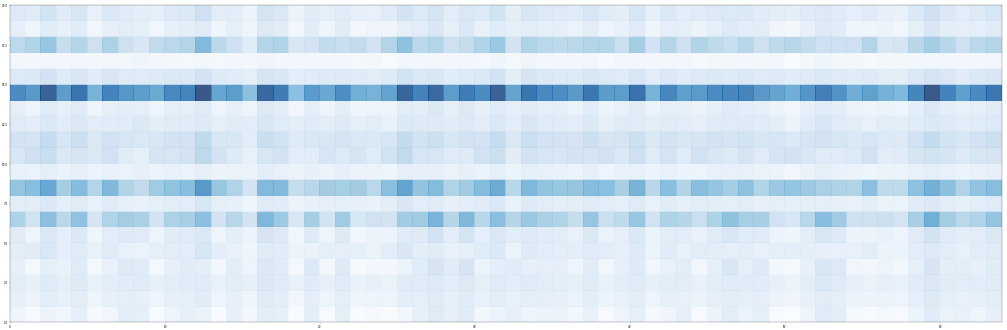

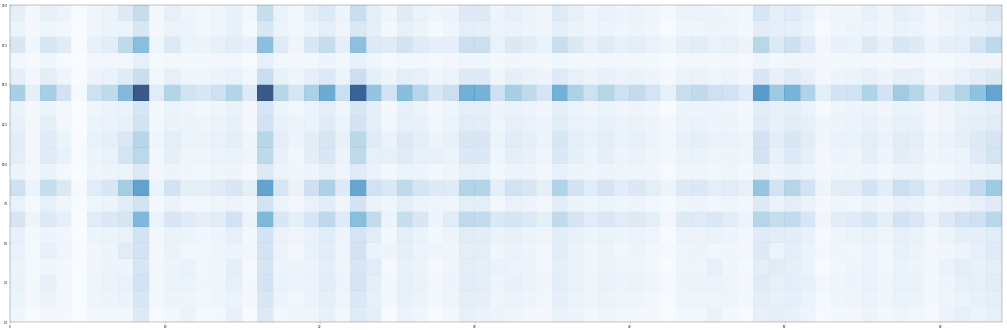

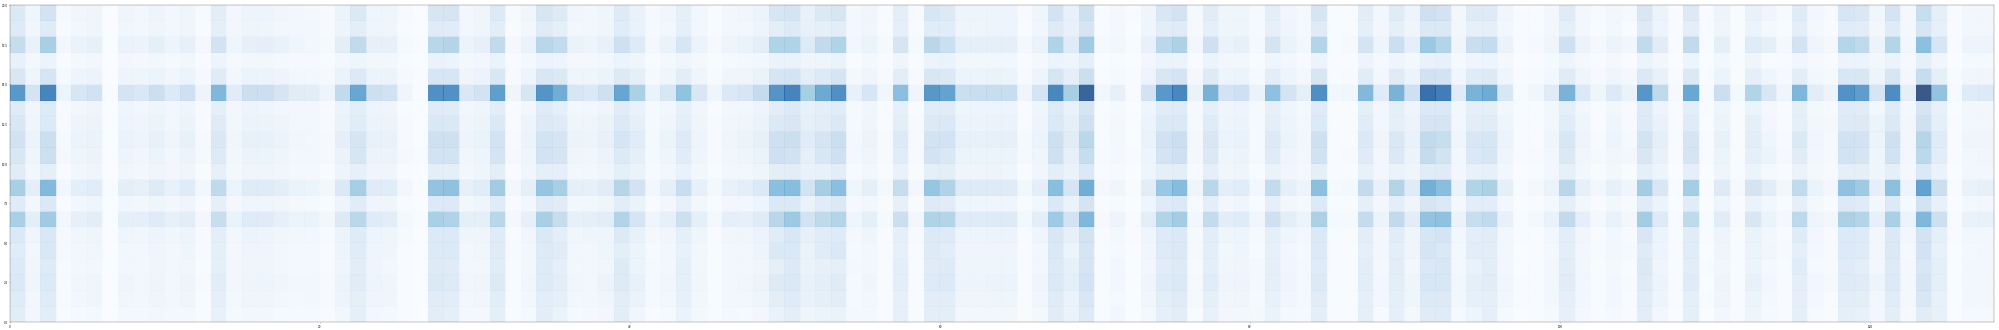

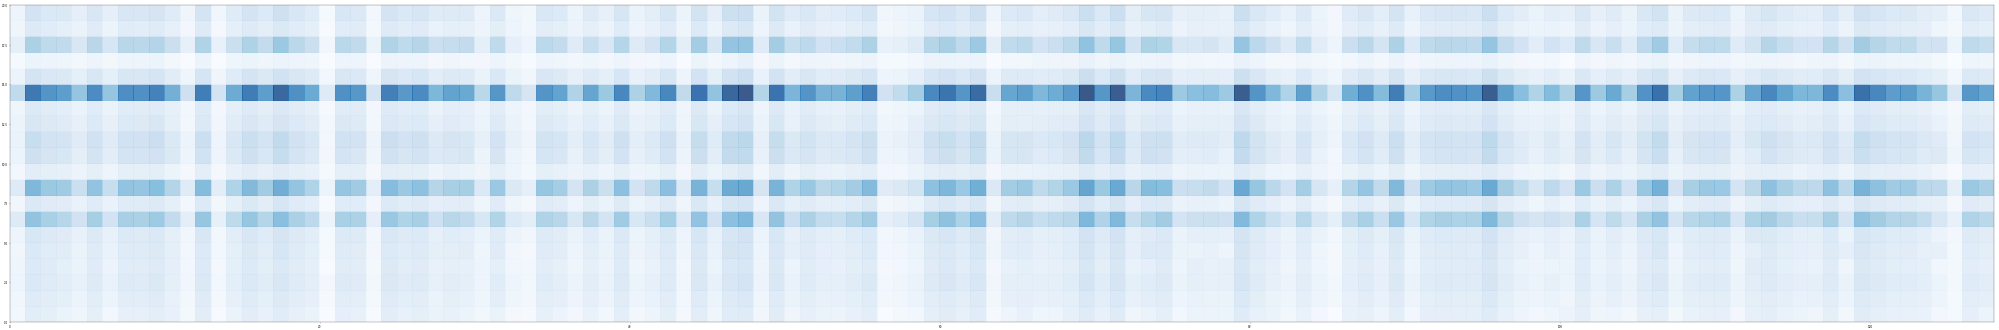

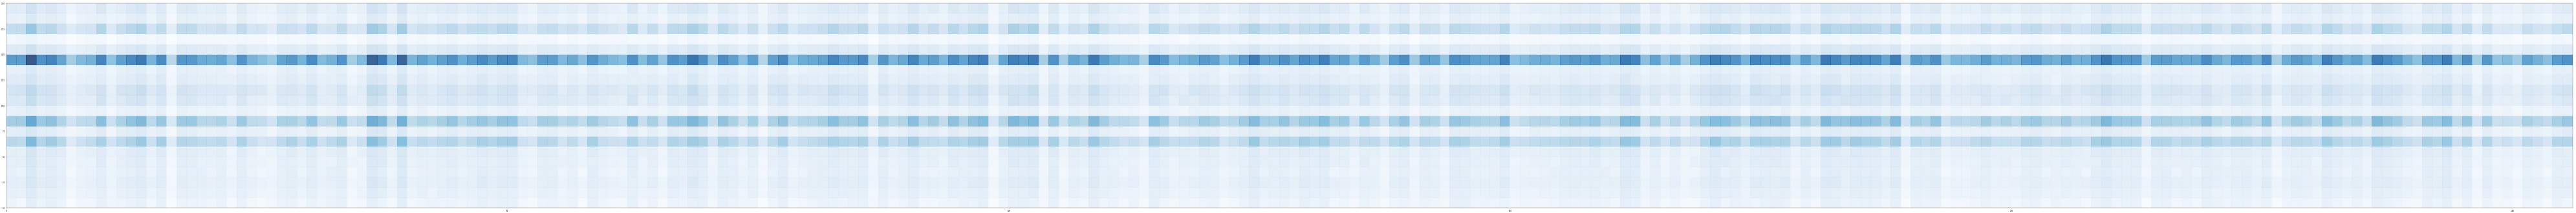

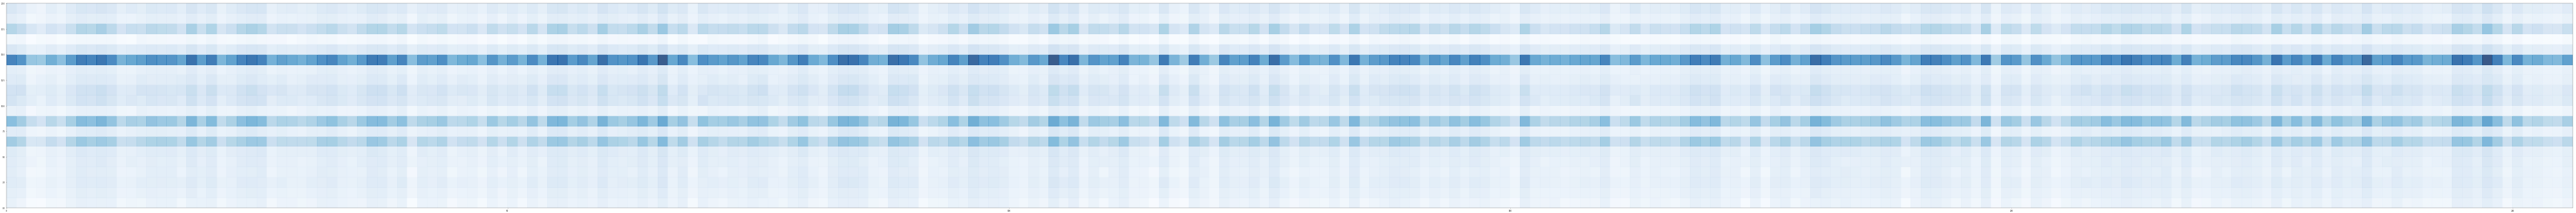

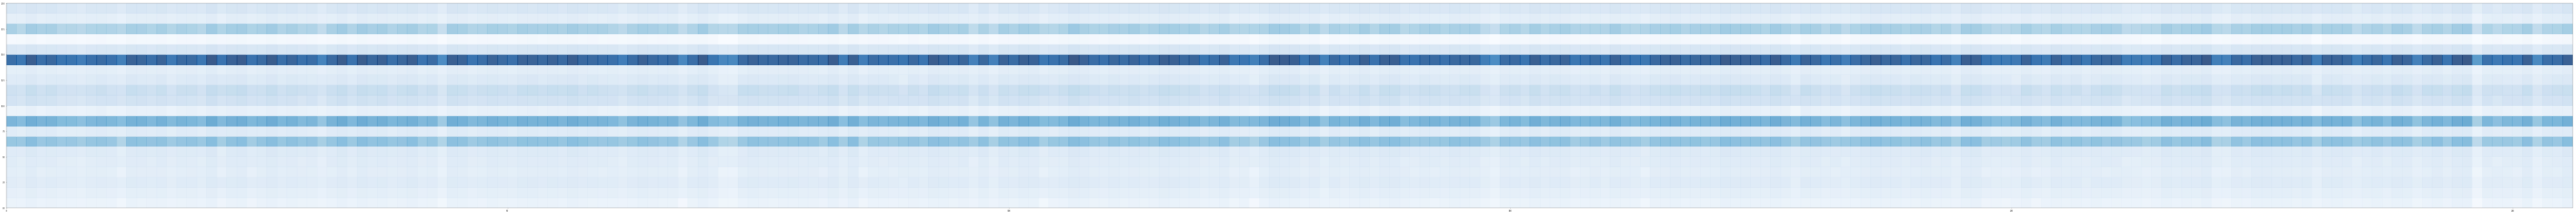

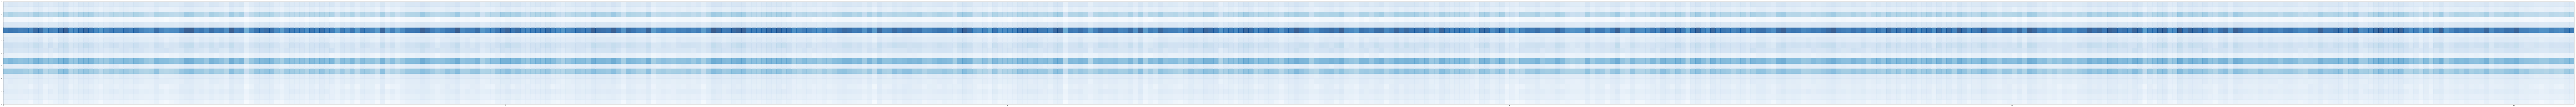

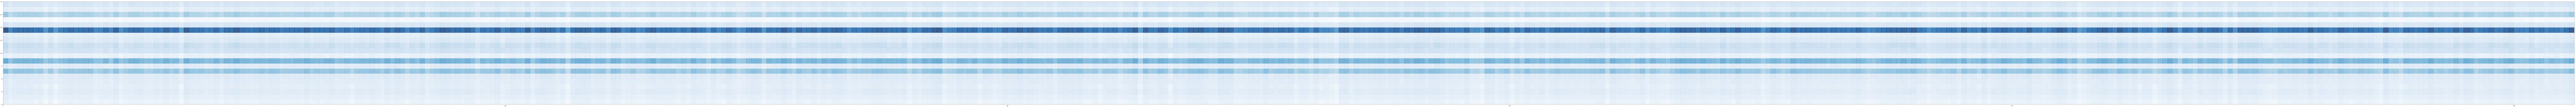

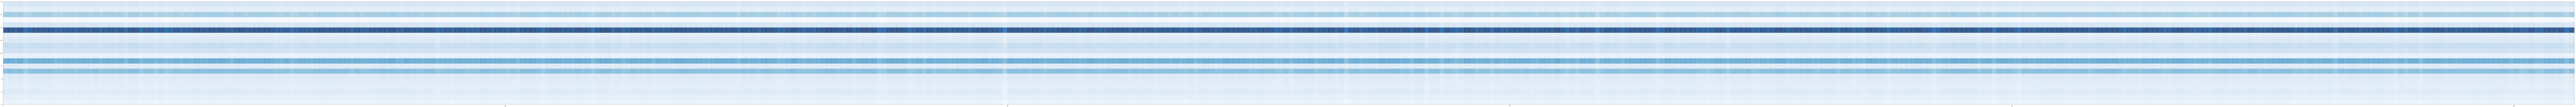

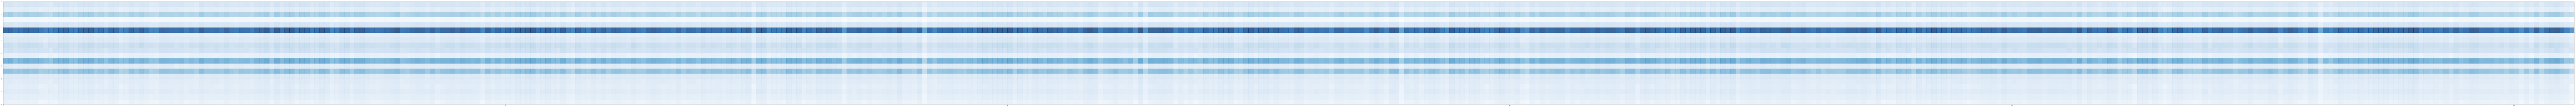

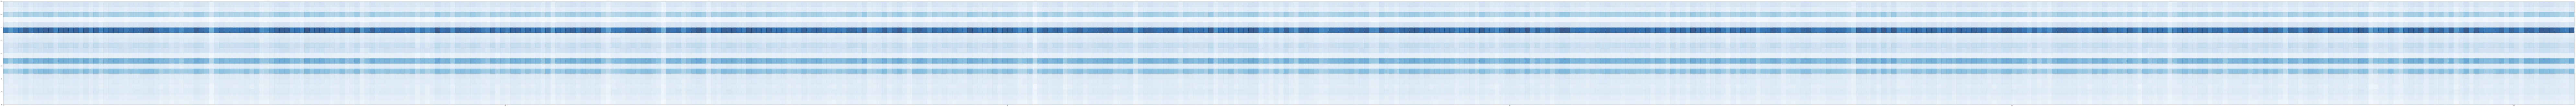

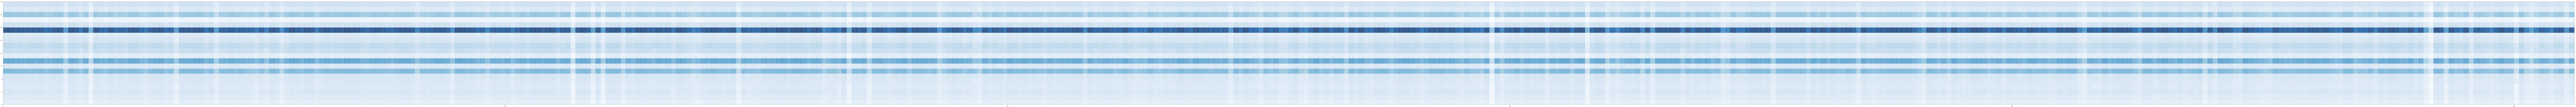

In [29]:
for i in range(13):
    arr_hm_new = np.sum(arr_hm[i], axis=0)/num_clas[i]
#     print arr_hm_new.shape

    fig= plt.figure(figsize=(arr_hm_new.shape[1], 21), dpi= 20, facecolor='w', edgecolor='k')
    ax = plt.axes()
    plt.subplot()
    heatmap = ax.pcolormesh(arr_hm_new,cmap=plt.cm.Blues,alpha=0.8)
#     plt.savefig('{}.png'.format(i))